# ***Sklearn Lab***

# **Loading Dataset as Dataframe using Pandas**

In [1]:
import pandas as pd
import numpy as np
import sklearn

volunteer = pd.read_csv('./heart disease classification dataset.csv')
vol=pd.read_csv('./heart disease classification dataset.csv')
volunteer.head()

# **Handling missing values**

In [2]:
volunteer.shape

(303, 15)

In [3]:
volunteer.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [4]:
volunteer=volunteer.dropna(axis=0,subset=['chol'])
volunteer.shape

(302, 15)

In [5]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(volunteer[['trestbps']])

volunteer['trestbps'] = impute.transform(volunteer[['trestbps']])

In [6]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(volunteer[['thalach']])

volunteer['thalach'] = impute.transform(volunteer[['thalach']])

In [7]:
volunteer.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

# **Encoding Categorical Features**

In [8]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  302 non-null    int64  
 1   age         302 non-null    int64  
 2   sex         302 non-null    object 
 3   cp          302 non-null    int64  
 4   trestbps    302 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         302 non-null    int64  
 7   restecg     302 non-null    int64  
 8   thalach     302 non-null    float64
 9   exang       302 non-null    int64  
 10  oldpeak     302 non-null    float64
 11  slope       302 non-null    int64  
 12  ca          302 non-null    int64  
 13  thal        302 non-null    int64  
 14  target      302 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 37.8+ KB


In [9]:
volunteer['sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

volunteer['sex']=enc.fit_transform(volunteer['sex'])

print(volunteer[['sex']].head())

   sex
0    1
1    1
2    0
3    1
4    0


In [11]:
volunteer['target'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

volunteer['target']=enc.fit_transform(volunteer['target'])

print(volunteer[['target']].head())

   target
0       1
1       1
2       1
3       1
4       1


# **Scaling**

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scale=MinMaxScaler()
scale.fit(volunteer)

MinMaxScaler()

In [14]:
volunteer=scale.transform(volunteer)

In [15]:
volunteer=pd.DataFrame(volunteer)
volunteer

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.003311,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.006623,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.009934,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.013245,0.583333,0.0,0.000000,0.356401,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.986755,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
298,0.990066,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
299,0.993377,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
300,0.996689,0.583333,1.0,0.000000,0.356401,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [16]:
print(volunteer.min(axis=0))
print(volunteer.max(axis=0))

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
dtype: float64
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
dtype: float64


# **Splitting**

In [17]:
volunteers=volunteer.drop(0,axis=1)


In [18]:
X=volunteers.drop(14,axis=1)
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.356401,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
298,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
299,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
300,0.583333,1.0,0.000000,0.356401,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [19]:
Y=volunteers[14]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
297    0.0
298    0.0
299    0.0
300    0.0
301    0.0
Name: 14, Length: 302, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [21]:
X_train.shape


(241, 13)

In [22]:
X_test.shape

(61, 13)

# ***Training and Testing***

In [23]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\arctic wolf\appdata\roaming\python\python38\site-packages
Requires: numpy, scipy, joblib, threadpoolctl
Required-by: sklearn


# **Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [25]:
print("Pre PCAAccuracy of Training {:.2f}".format(rfc.score(X_train, Y_train)))
print("Pre PCAAccuracy of Testing {:.2f}".format(rfc.score(X_test, Y_test)))


Pre PCAAccuracy of Training 1.00
Pre PCAAccuracy of Testing 0.72


In [26]:
preRFC_train=round(rfc.score(X_train, Y_train),2)*100
preRFC_test=round(rfc.score(X_test, Y_test),2)*100

In [27]:
predictions = rfc.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions, Y_test)
print(cm)

[[19  7]
 [10 25]]


<AxesSubplot:>

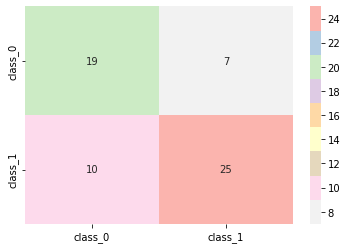

In [29]:
from seaborn import heatmap
heatmap(cm , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

# **Neural Network (MLP) Classifier**

In [30]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [31]:
print("Pre PCA Accuracy of Training {:.2f}".format(mlp.score(X_train, Y_train)))
print("Pre PCA Accuracy of Testing {:.2f}".format(mlp.score(X_test, Y_test)))

Pre PCA Accuracy of Training 0.86
Pre PCA Accuracy of Testing 0.79


In [32]:
preMLP_train = round(mlp.score(X_train, Y_train),2)*100
preMLP_test = round(mlp.score(X_test, Y_test),2)*100

In [33]:
predictions = mlp.predict(X_test)
print(predictions)

[0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions, Y_test)
print(cm)

[[20  4]
 [ 9 28]]


<AxesSubplot:>

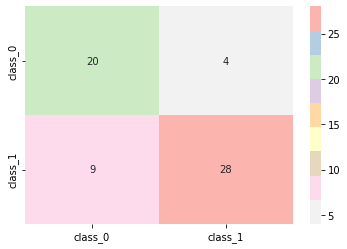

In [35]:
from seaborn import heatmap
heatmap(cm , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

# **Support Vector Machines**

In [36]:
from sklearn.svm import SVC
svc = SVC(random_state=0, tol=1e-5)
svc.fit(X_train, Y_train) 

SVC(random_state=0, tol=1e-05)

In [37]:
print("Pre PCA Accuracy of Training {:.2f}".format(svc.score(X_train, Y_train)))
print("Pre PCA Accuracy of Testing  {:.2f}".format(svc.score(X_test, Y_test)))

Pre PCA Accuracy of Training 0.89
Pre PCA Accuracy of Testing  0.75


In [38]:
preSVM_train = round(svc.score(X_train, Y_train),2)*100
preSVM_test = round(svc.score(X_test, Y_test),2)*100

In [39]:
predictions = svc.predict(X_test)
print(predictions)

[0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(predictions, Y_test)
print(cm)

[[21  7]
 [ 8 25]]


<AxesSubplot:>

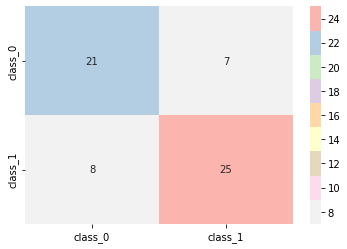

In [41]:
from seaborn import heatmap
heatmap(cm , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

# **Principal Component Analysis**

In [42]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=13)


In [43]:
volunteer.shape

(302, 15)

In [44]:
volunteer.keys()

RangeIndex(start=0, stop=15, step=1)

In [45]:
comps= pca.fit_transform(volunteer)
print(comps)

[[-0.582703   -0.48315734  0.23118141 ...  0.08009121 -0.10703438
   0.12444324]
 [-0.55047096 -0.40526708 -0.13202227 ...  0.31116048 -0.19049526
   0.13602722]
 [-0.9097338   0.44368255 -0.05377775 ...  0.15157457 -0.26165156
  -0.10756674]
 ...
 [ 0.72874733 -0.29724001  0.83046331 ...  0.02939634 -0.0674346
  -0.14978424]
 [ 1.09843606  0.02492517 -0.25858317 ... -0.13979824  0.1855691
  -0.19009472]
 [ 0.1881163   0.58275893  0.76117893 ... -0.03260808  0.24044857
   0.12843021]]


In [46]:
comps.shape

(302, 13)

In [47]:
pca.explained_variance_ratio_

array([0.34763979, 0.14420619, 0.1043977 , 0.09486729, 0.06672864,
       0.05011888, 0.04762238, 0.03718497, 0.0259961 , 0.02344918,
       0.01725619, 0.01334601, 0.0107206 ])

In [48]:
sum(pca.explained_variance_ratio_)

0.983533928321128

In [49]:
pdf = pd.DataFrame(data=comps, columns=["pc 1", "pc 2","pc 3","pc 4","pc 5","pc 6","pc 7","pc 8","pc 9","pc 10","pc 11","pc 12","pc 13" ])
main_df=pd.concat([pdf, vol[["target"]]], axis=1)

In [50]:

main_df=main_df.drop([302],axis=0)
main_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,pc 11,pc 12,pc 13,target
0,-0.582703,-0.483157,0.231181,1.117898,0.756965,-0.362957,-0.007951,-0.042035,0.266647,-0.162500,0.080091,-0.107034,0.124443,yes
1,-0.550471,-0.405267,-0.132022,0.027841,0.875066,-0.297092,0.388875,-0.012482,-0.023367,0.334457,0.311160,-0.190495,0.136027,yes
2,-0.909734,0.443683,-0.053778,-0.129737,-0.122030,-0.169963,-0.285931,-0.146332,-0.057966,0.211759,0.151575,-0.261652,-0.107567,yes
3,-0.671232,-0.446982,-0.273372,-0.194171,-0.122684,-0.091211,0.160519,0.050164,-0.045755,-0.133140,0.082949,-0.204959,0.194171,yes
4,-0.361282,0.838383,-0.821894,0.038885,-0.303176,0.044661,0.063398,0.078534,-0.100183,-0.107946,0.139333,-0.162826,0.245179,yes


In [51]:
x=main_df.iloc[:,1:-1]
y=  main_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=42)

In [52]:
y_train.dtypes

dtype('O')

# **Training and Testing with PCA**

In [53]:
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
postSVM_train=round(svc.score(x_train, y_train),2)*100
postSVM_test=round(svc.score(x_test, y_test),2)*100
print("Post PCA Accuracy of Training{:.2f}".format(svc.score(x_train, y_train)))
print("Post PCA Accuracy of Testing{:.2f}".format(svc.score(x_test, y_test)))

Post PCA Accuracy of Training0.76
Post PCA Accuracy of Testing0.72


In [54]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
postRFC_train=round(rfc.score(x_train, y_train),2)*100
postRFC_test=round(rfc.score(x_test, y_test),2)*100
print("Post PCA Accuracy of Training {:.2f}".format(rfc.score(x_train, y_train)))
print("Post PCA Accuracy of Testing {:.2f}".format(rfc.score(x_test, y_test)))

Post PCA Accuracy of Training 1.00
Post PCA Accuracy of Testing 0.92


In [55]:
mlp=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
mlp.fit(x_train, y_train)
postMLP_train=round(mlp.score(x_train, y_train),2)*100
postMLP_test=round(mlp.score(x_test, y_test),2)*100
print("Post PCA Accuracy of Training {:.2f}".format(mlp.score(x_train, y_train)))
print("Post PCA Accuracy of Testing {:.2f}".format(mlp.score(x_test, y_test)))

Post PCA Accuracy of Training 0.98
Post PCA Accuracy of Testing 0.92


In [56]:
data = [[preSVM_test, preRFC_test, preMLP_test],
[postSVM_test, postRFC_test, postMLP_test],
[preSVM_train, preRFC_train, preMLP_train],
[postSVM_train, postRFC_train, postMLP_train]]
X = np.arange(3)

# **Comparison through plotting**

Text(0.5, 1.0, 'Visualization Analysis')

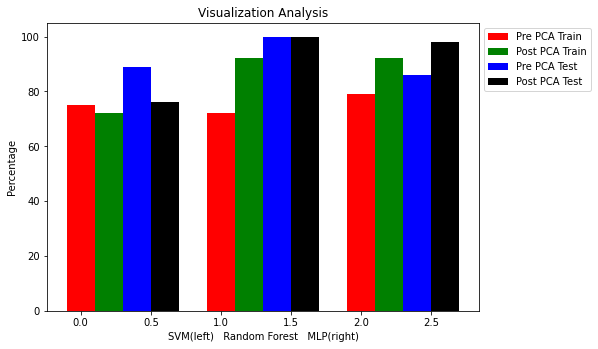

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure()
 
a = fig.add_axes([0,0,1,1])
 
a.bar(X + 0.00, data[0], color = 'red', width = 0.20)
a.bar(X + 0.20, data[1], color = 'green', width = 0.20)
a.bar(X + 0.40, data[2], color = 'blue', width = 0.20)
a.bar(X + 0.60, data[3], color = 'black', width = 0.20)
 
a.legend(labels=['Pre PCA Train','Post PCA Train','Pre PCA Test', 'Post PCA Test'],loc='upper left',bbox_to_anchor=(1, 1))
 
plt.ylabel('Percentage')
plt.xlabel('SVM(left)   Random Forest   MLP(right)')
plt.title('Visualization Analysis')